In [1]:
! pip install onnxruntime
import numpy as np
import onnxruntime as rt
from PIL import Image

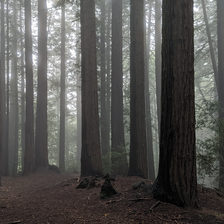

In [2]:
Image.open("redwood-224x224.png")

In [3]:
np.array(Image.open("123.png")).transpose(2,0,1)

array([[[ 17,  49],
        [ 81, 113],
        [145, 177]],

       [[ 18,  50],
        [ 82, 114],
        [146, 178]],

       [[ 19,  51],
        [ 83, 115],
        [147, 179]]], dtype=uint8)

In [4]:
np.array(Image.open("123.png"))

array([[[ 17,  18,  19],
        [ 49,  50,  51]],

       [[ 81,  82,  83],
        [113, 114, 115]],

       [[145, 146, 147],
        [177, 178, 179]]], dtype=uint8)

In [5]:
np.array(Image.open("123.png"))[None, ...]

array([[[[ 17,  18,  19],
         [ 49,  50,  51]],

        [[ 81,  82,  83],
         [113, 114, 115]],

        [[145, 146, 147],
         [177, 178, 179]]]], dtype=uint8)

In [6]:
def image_transform_onnx(path, size) -> np.ndarray:
    """path and size to batch-channel-height-width tensor input"""
    image = Image.open(path).resize((size,size))
    hwc = np.array(image).astype(np.float32) / 255
    chw = hwc.transpose(2,0,1)
    bchw = chw[None, ...]
    return bchw

In [7]:
bchw_redwood = image_transform_onnx("redwood-224x224.png", 224)

In [8]:
sess = rt.InferenceSession("model.onnx")

In [9]:
input_name = sess.get_inputs()[0].name

In [10]:
input_name

'input'

In [11]:
output_name = sess.get_outputs()[0].name

In [12]:
output_name

'output'

In [13]:
input_dims = sess.get_inputs()[0].shape

In [14]:
input_dims

['batch_size', 3, 224, 224]

In [15]:
sess_run = sess.run([output_name], {input_name: bchw_redwood})
results = sess_run[0]


In [16]:
results

array([[0.33403412, 0.66596586]], dtype=float32)

In [17]:
sess_run

[array([[0.33403412, 0.66596586]], dtype=float32)]